In [1]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
# reupload all data to have as one dataset again
completedf1 = pd.concat([pd.read_csv('0204plays.csv'),pd.read_csv('0507plays.csv'),pd.read_csv('0810plays.csv'),pd.read_csv('1114plays.csv')])

#(remove 2002, because it has served it's purpose of creating 2003 priors)
df = completedf1[completedf1['year']>2002].reset_index(drop=True)

Configure lists to be used for creating bar charts of running and passing by distance to go to first down.

In [34]:
titlesr = []
titlesy = []
titlesp = []
xs = []
rs = []
ys = []
ps = []
sds = []
# iterate through the groupby of the dataframe by down and keep all years 2003-14
for d,df1 in df.groupby('down'):
    titlesr.append('Run Plays by Yards to First Down on Down ' + str(d))
    titlesy.append('Pass Plays by Yards to First Down on Down ' + str(d))
    titlesp.append('Passing % by Yards to First Down on Down ' + str(d))
    # create the unique list of distance to first down
    yds = sorted(df1.yds_to_go.unique())
    xs.append(yds)
    # create lists of the number of run plays, pass plays, and the pass percentage (pass per runs + pass plays) by yds_to_go
    rs.append([int(df1[df1.yds_to_go==y]['isRun'].sum()) for y in yds])
    ys.append([int(df1[df1.yds_to_go==y]['RESP'].sum()) for y in yds])
    ps.append([df1[df1.yds_to_go==y]['RESP'].mean() for y in yds])

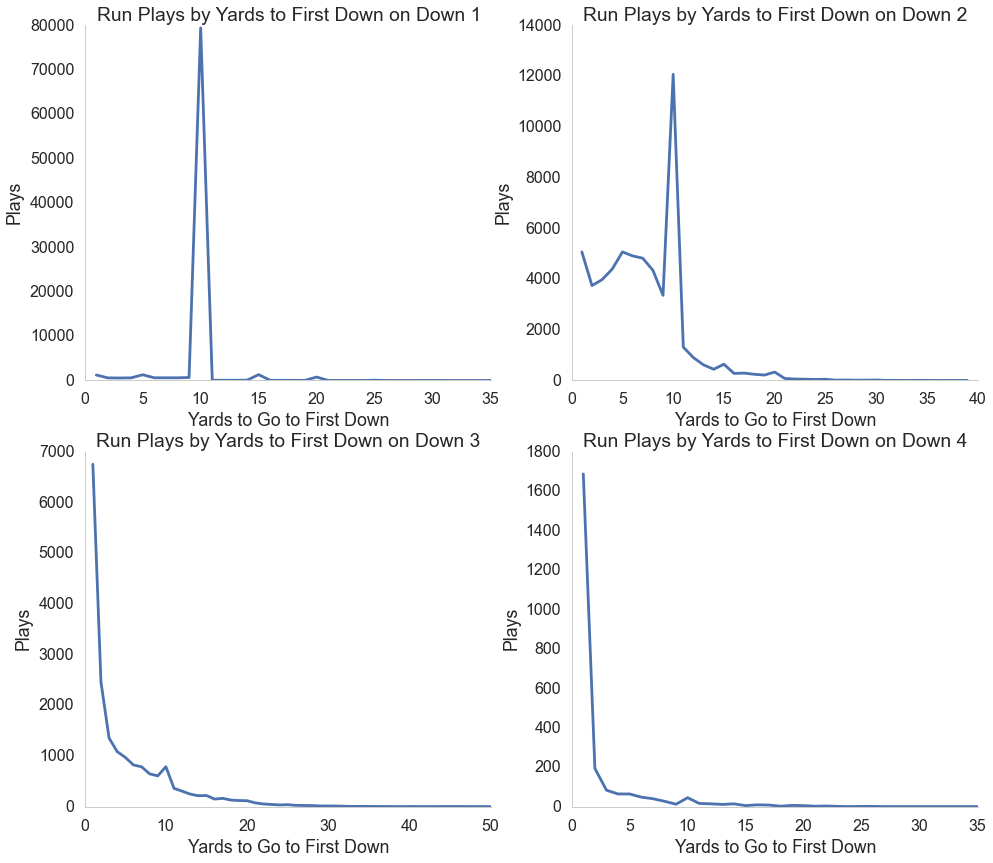

In [35]:
# create subplots for bar charts of number of running plays on each down, by yards to go to first down for 2003-14 combined
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], rs[i])
    axes[i].set_title(titlesr[i])
    axes[i].set_ylabel("Plays")
    axes[i].set_xlabel("Yards to Go to First Down")
    axes[i].grid(False)
    sns.despine()

Above, we have bar charts of the number of running plays for each down, broken down by the number of yards to go until 1st down.  It is clear that teams run the ball more on 1st and 2nd down, particularly when they are between 5 and 10 yards away from a first down (teams like to run on 1st and 10, which is the typical starting point for new downs, and if a team has a short or 0-yard gain on 1st down, then they often elect to run on 2nd down). However, also expectedly, on 3rd and 4th downs, teams do not run the ball very often unless they are close to the first down, which is intuitive since running plays don't usually get as many yards as passing plays.

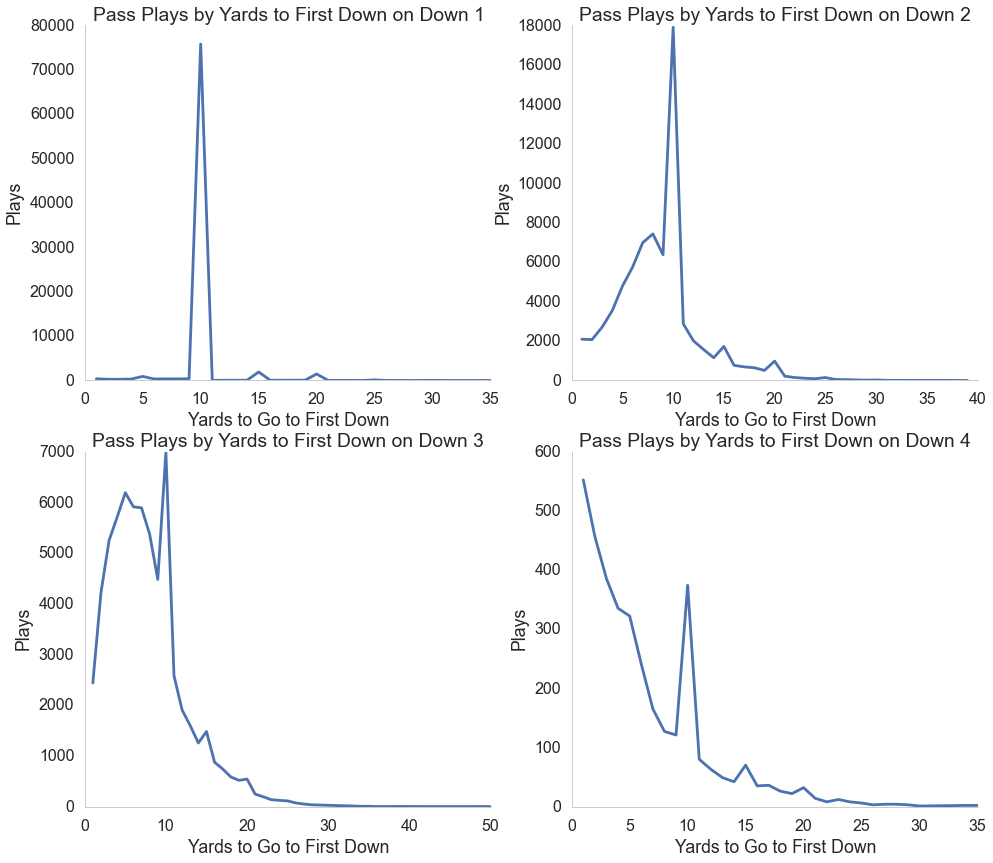

In [36]:
# create subplots for bar charts of number of passing plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ys[i])
    axes[i].set_title(titlesy[i])
    axes[i].set_ylabel("Plays")
    axes[i].set_xlabel("Yards to Go to First Down")
    axes[i].grid(False)
    sns.despine()

These charts of pass plays by down and yards to first down reveal a few things.  First of all, on first down, the most common (and almost only) yards to go is 10 (each new down starts with 1st and 10 barring penalties or if teams are 1st and goal inside the 10 yard-line), so that explains the huge spike for that chart.  Elsewhere, we see that on 2nd down, the further teams were from the 1st down marker, the more pass plays there are (up to 10 yards away, after which sample size is quite small).  There is a similar trend with 3rd down, but on 4th down we see that there are more instances of passing on 4th and short (inside 5 yards to go) relative to other distances to go (again, with an exception of 4th and 10, a situation lots of teams faced and elected to pass on in order to try to gain a lengthy first down).

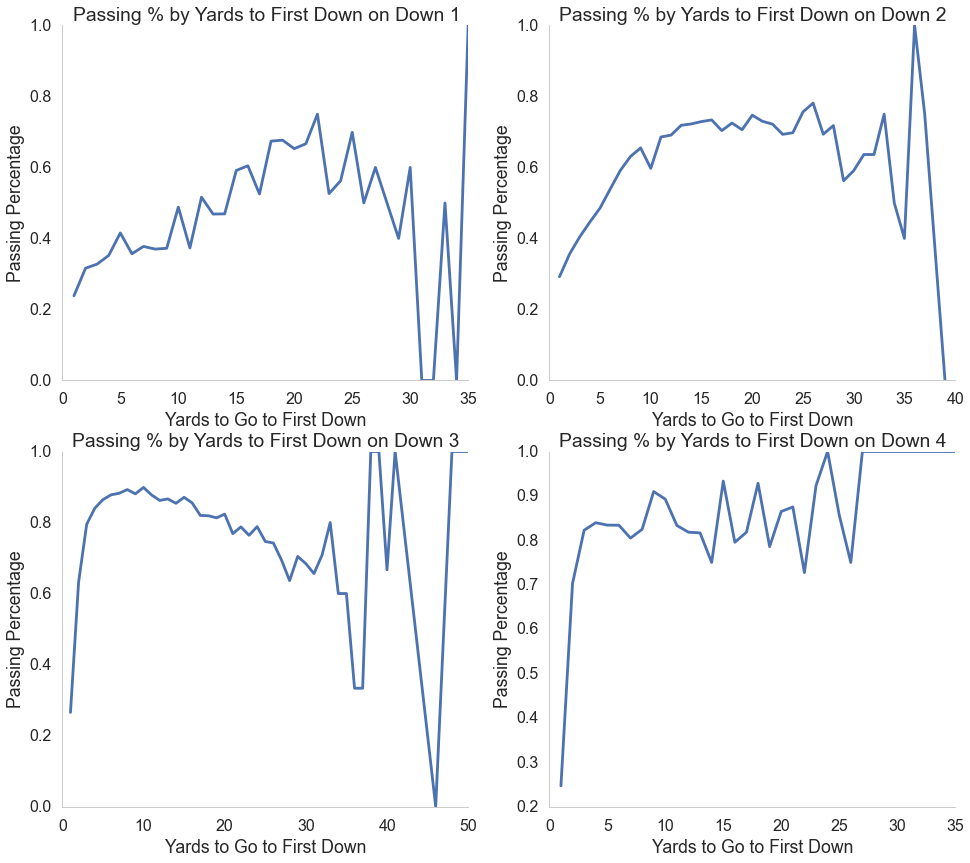

In [37]:
# create subplots for bar charts of % of plays that were passes on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ps[i])
    axes[i].set_title(titlesp[i])
    axes[i].set_ylabel("Passing Percentage")
    axes[i].set_xlabel("Yards to Go to First Down")
    axes[i].grid(False)
    sns.despine()

Above, we see a very clear trend across all four downs: teams pass more often than they run the ball the further away from the first down marker they are (this holds up to a certain distance before falling off because teams can give up on a drive or avoid a turnover by keeping the ball on the ground, not to mention that the sample size is very small for the larger distances so those percentages are not very meaningful for rare cases).  Also evident is that teams passing percentage is much higher on 3rd and 4th down than it is on 1st and 2nd down.  Moreover, the slope from 1-10 yards away from a 1st down is much steeper for 3rd and 4th down than it is for 2nd down (which is also steeper than that for 1st down), indicating that distance to go is more important as the down increases (as the team gets closer to punting or losing possession).